# Customer Segmentation Project: K-Means Clustering

## Project Overview
This project focuses on segmenting retail store customers into meaningful groups based on their purchasing behaviors. The insights will support targeted marketing and strategic business decisions.

## Dataset Description
The dataset includes:
- **CustomerID**: Unique identifier for each customer.
- **Gender**: Gender of the customer.
- **Age**: Age of the customer.
- **Annual Income (k$)**: Annual income in thousands of dollars.
- **Spending Score (1-100)**: A score assigned based on customer spending patterns.

## Objective
To group customers using K-means clustering, focusing on:
1. Annual Income.
2. Spending Score.

## Approach

### 1. Data Understanding and EDA
- **Explore Dataset**:
  - Check data structure, types, and completeness.
  - Use descriptive statistics and visualizations to understand distributions.
- **Identify Relationships**:
  - Analyze correlations between features.
  - Visualize patterns using scatterplots, pairplots, and histograms.

### 2. Data Preparation
- **Handle Missing Values**:
  - Impute or remove missing entries.
- **Outlier Detection**:
  - Identify and address outliers using Z-scores or IQR.
- **Scaling Features**:
  - Normalize numerical data using MinMaxScaler to improve clustering performance.

### 3. Determine Optimal Clusters
- **Methods**:
  - Elbow Method: Plot inertia to find the optimal cluster count.
  - Silhouette Score: Evaluate the quality of cluster separation.
  - Gap Statistic: Compare within-cluster variance to a reference distribution.

### 4. Model Implementation
- **Train the K-means Model**:
  - Apply K-means using the optimal cluster count.
  - Use `k-means++` initialization to improve centroid selection.
- **Evaluate Performance**:
  - Assess inertia, silhouette scores, and cluster consistency.

### 5. Model Optimization
- **Hyperparameter Tuning**:
  - Test different distance metrics (e.g., Euclidean, Manhattan).
  - Explore PCA to reduce dimensions and improve clustering.

### 6. Post-Processing and Interpretation
- **Analyze Clusters**:
  - Summarize characteristics of each cluster (e.g., income ranges, spending behavior).
- **Visualize Results**:
  - Create scatterplots, heatmaps, and cluster comparison graphs.

## Expected Outcome
This project will reveal customer segments based on purchasing behavior, enabling the retail store to personalize its marketing strategies and improve overall customer satisfaction.


## 1. Data Understanding and EDA
- **Explore Dataset**:
  - Check data structure, types, and completeness.
  - Use descriptive statistics and visualizations to understand distributions.
- **Identify Relationships**:
  - Analyze correlations between features.
  - Visualize patterns using scatterplots, pairplots, and histograms.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset
data = pd.read_csv("/content/drive/MyDrive/prodigy_infotech_internship/mall_customer_seg_K_Means_project/Mall_Customers.csv")

In [3]:
# Check data structure
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Get descriptive statistics
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [5]:
# Check for missing dat
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


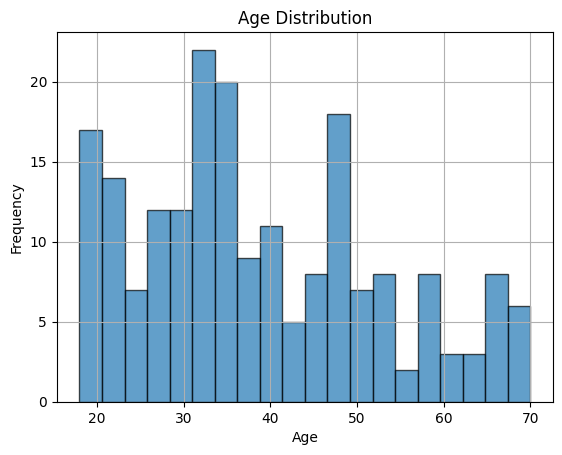

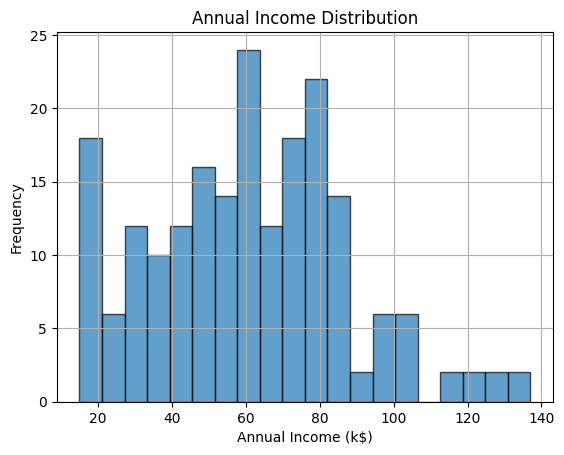

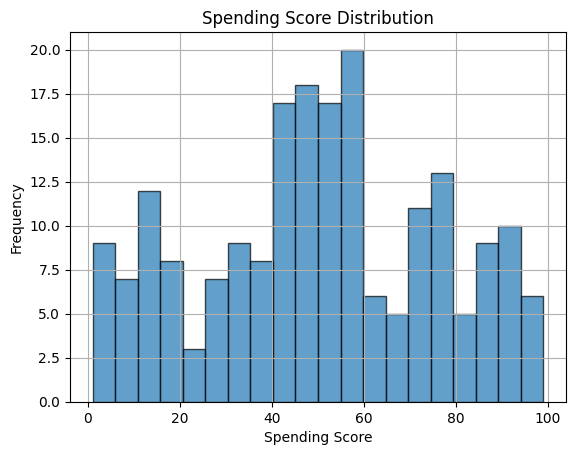

In [6]:
# Exploration Data Analysis (EDA)
# Feature Distribution

# Plot distributions
data["Age"].hist(bins=20, edgecolor="black", alpha=0.7)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

data["Annual Income (k$)"].hist(bins=20, edgecolor="black", alpha=0.7)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")
plt.show()

data["Spending Score (1-100)"].hist(bins=20, edgecolor="black", alpha=0.7)
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Frequency")
plt.show()

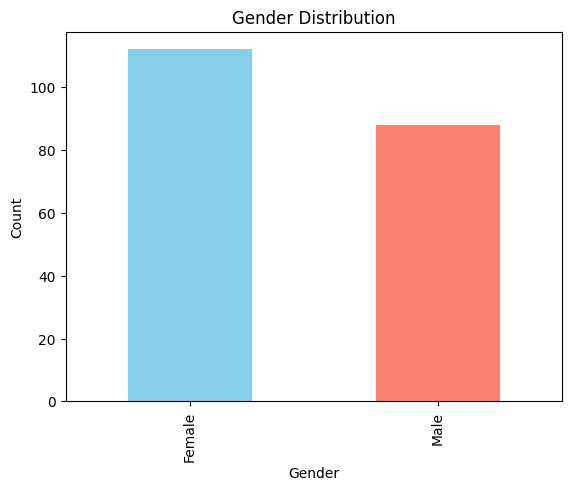

In [7]:
# Gender Proportions
# Gender distribution
gender_counts = data["Gender"].value_counts()
gender_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

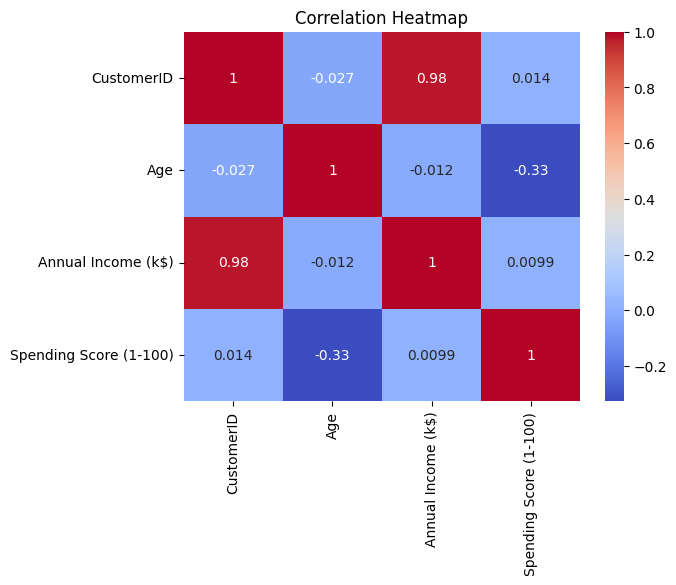

In [8]:

# select only numeric columns
numerical_data = data.select_dtypes(include=np.number)

# Correlation heatmap
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 2. Data Preparation
- **Handle Missing Values**:
  - Impute or remove missing entries.
- **Outlier Detection**:
  - Identify and address outliers using Z-scores or IQR.
- **Scaling Features**:
  - Normalize numerical data using MinMaxScaler to improve clustering performance.

In [9]:
# identify and handle outliers using Z-score or IQR
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(data.select_dtypes(include = np.number)))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers
data = data[~outliers]

In [10]:
# calculate IQR
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

# Filter outliers
outliers = (numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))
data = data[~outliers.any(axis=1)]

In [11]:
# Scaling Features
# Normalize numerical features for clustering using MinMaxScaler:

from sklearn.preprocessing import MinMaxScaler

# select numerical features
numerical_features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the numerical features and assign back to the DataFrame using .loc
data.loc[:, numerical_features] = scaler.fit_transform(data.loc[:, numerical_features])


<ipython-input-11-2063f5a9f14b>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.01923077 0.05769231 0.03846154 0.09615385 0.25       0.07692308
 0.32692308 0.09615385 0.88461538 0.23076923 0.94230769 0.32692308
 0.76923077 0.11538462 0.36538462 0.07692308 0.32692308 0.03846154
 0.65384615 0.32692308 0.32692308 0.13461538 0.53846154 0.25
 0.69230769 0.21153846 0.51923077 0.32692308 0.42307692 0.09615385
 0.80769231 0.05769231 0.67307692 0.         0.59615385 0.05769231
 0.46153846 0.23076923 0.34615385 0.03846154 0.90384615 0.11538462
 0.57692308 0.25       0.59615385 0.11538462 0.61538462 0.17307692
 0.21153846 0.25       0.59615385 0.28846154 0.25       0.78846154
 0.61538462 0.55769231 0.63461538 0.98076923 0.17307692 0.67307692
 1.         0.01923077 0.94230769 0.69230769 0.86538462 0.
 0.48076923 0.96153846 0.01923077 0.26923077 1.         0.55769231
 0.80769231 0.80769231 0.78846154 0.15384615 0.51923077 

## 3. Determine Optimal Clusters
- **Methods**:
  - Elbow Method: Plot inertia to find the optimal cluster count.
  - Silhouette Score: Evaluate the quality of cluster separation.
  - Gap Statistic: Compare within-cluster variance to a reference distribution.

### 1. Elbow Method

- **Purpose**: To find the point at which the rate of decrease of the sum of squared errors (SSE) starts to slow down significantly.

- **Implementation:**
  - Fit K-means models with different numbers of clusters (e.g., 1 to 10).
  - Calculate SSE for each model.
  - Plot SSE vs. number of clusters to identify the "elbow".

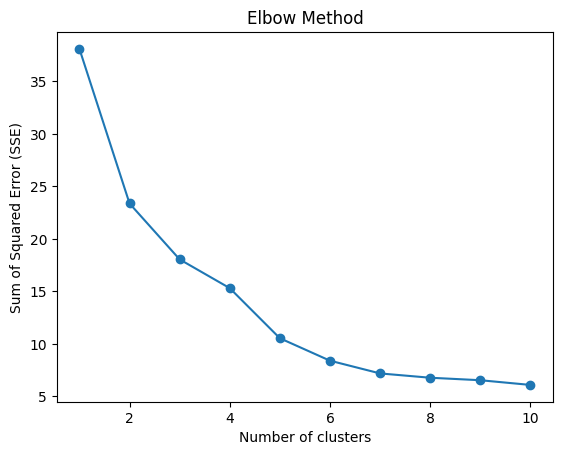

In [12]:
from sklearn.cluster import KMeans

# Create an empty list to store SSE values
sse = []

# Try different numbers of clusters
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(data[numerical_features])
  sse.append(kmeans.inertia_)

# Plot the SSE to find the "elbow"
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

### 2. Silhouette Score

- **Purpose:** To evaluate the quality of the clusters by measuring how similar the data points are to their own cluster compared to other clusters.
-**Implementation:**

  - For each number of clusters, calculate the silhouette score.
  - Plot silhouette scores to find the optimal number of clusters.


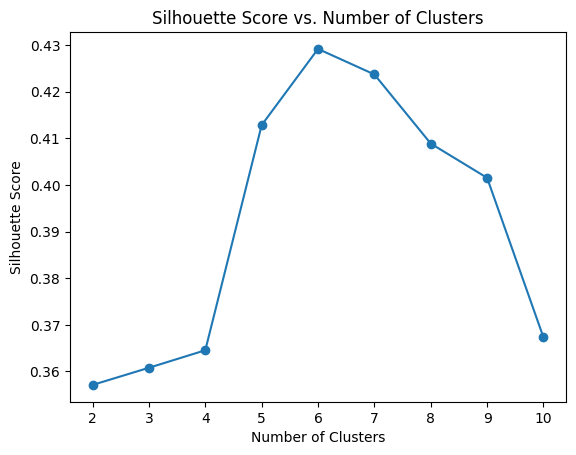

In [13]:
from sklearn.metrics import silhouette_score

# Create an empty list to store silhouette scores
sil_scores = []

# Try different numbers of clusters
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[numerical_features])
    sil_scores.append(silhouette_score(data[numerical_features], kmeans.labels_))

# Plot silhouette scores
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


### Getting the best or exact optimal number of clusters:
 using the Elbow Method and Silhouette Score.

In [14]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def optimal_clusters(X, max_clusters=10):
    """
    Determines the optimal number of clusters using the Elbow Method and Silhouette Score.

    Args:
        X: The data to be clustered (Pandas DataFrame or NumPy array).
        max_clusters: The maximum number of clusters to consider.

    Returns:
        The optimal number of clusters.
    """

    wcss = []  # Within-cluster sum of squares
    silhouette_scores = []  # Silhouette scores for each cluster count

    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    # Find the elbow point using the second derivative of WCSS
    wcss_diff = np.diff(wcss)
    wcss_diff2 = np.diff(wcss_diff)
    elbow_idx = np.argmin(wcss_diff2) + 2

    # Consider the Silhouette Score to refine the choice
    best_silhouette_idx = np.argmax(silhouette_scores) + 2

    # Combine both methods for a final decision
    if abs(elbow_idx - best_silhouette_idx) > 1:
        print(f"Elbow method suggests {elbow_idx} clusters.")
        print(f"Silhouette score suggests {best_silhouette_idx} clusters.")
    else:
        print(f"Both methods agree on {elbow_idx} clusters.")

    # Return the optimal number of clusters
    return elbow_idx if abs(elbow_idx - best_silhouette_idx) <= 1 else best_silhouette_idx

# Example usage:
# Ensure numerical_features contain the relevant scaled numerical columns.
X = data[numerical_features].values

optimal_num_clusters = optimal_clusters(X)
print("Optimal number of clusters:", optimal_num_clusters)



Elbow method suggests 3 clusters.
Silhouette score suggests 6 clusters.
Optimal number of clusters: 6


## 4. Model Implementation
- **Train the K-means Model**:
  - Apply K-means using the optimal cluster count.
  - Use `k-means++` initialization to improve centroid selection.
- **Evaluate Performance**:
  - Assess inertia, silhouette scores, and cluster consistency.

In [15]:
# Train the K-means Model
from sklearn.cluster import KMeans

# Optimal number of clusters
optimal_clusters = 6

# Train the K-means model
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(data[numerical_features])

# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_

In [16]:
# Evaluate Performance

# Inertia (measures the tightness of the clusters)
print(f"Inertia: {kmeans.inertia_}")


Inertia: 8.405591300483993


In [17]:
# Silhouette score (assess the quality of clustering)
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(data[numerical_features], kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.42918876171699133


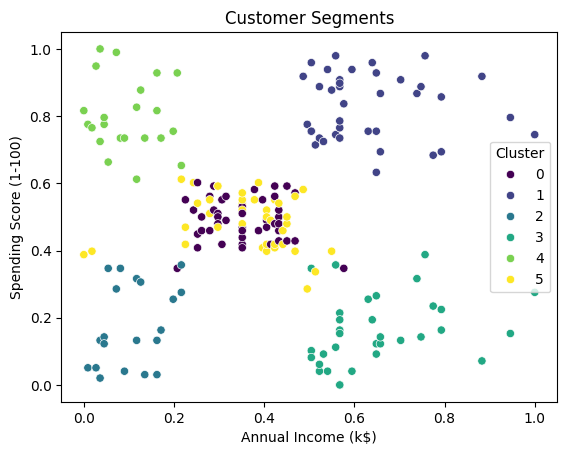

In [18]:
# Visualize Clusters
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [19]:
# Plot centroids for better insights
centroids = kmeans.cluster_centers_

for i in range(optimal_num_clusters):
    print(f"Centroid {i}: {centroids[i]}")


Centroid 0: [0.73717949 0.35375375 0.49047619]
Centroid 1: [0.28390688 0.63252726 0.82760473]
Centroid 2: [0.54326923 0.10585586 0.17704082]
Centroid 3: [0.4527972  0.64892165 0.16048237]
Centroid 4: [0.13986014 0.0966421  0.79962894]
Centroid 5: [0.17115385 0.35698198 0.48622449]


## 5. Model Optimization
- **Hyperparameter Tuning**:
  - Test different distance metrics (e.g., Euclidean, Manhattan).
  - Explore PCA to reduce dimensions and improve clustering.

In [20]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.7 MB/s eta 0:00:00


In [21]:
# Experimennt with different distance metrics
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=optimal_num_clusters, metric='manhattan', random_state=42)
kmedoids.fit(data[numerical_features])
data['Cluster_KMedoids'] = kmedoids.labels_


In [22]:
# Dimensionality Reduction with PCA
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[numerical_features])

# Train K-means on reduced dimensions
kmeans_pca = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(data_pca)

# Add cluster labels from PCA
data['Cluster_PCA'] = kmeans_pca.labels_


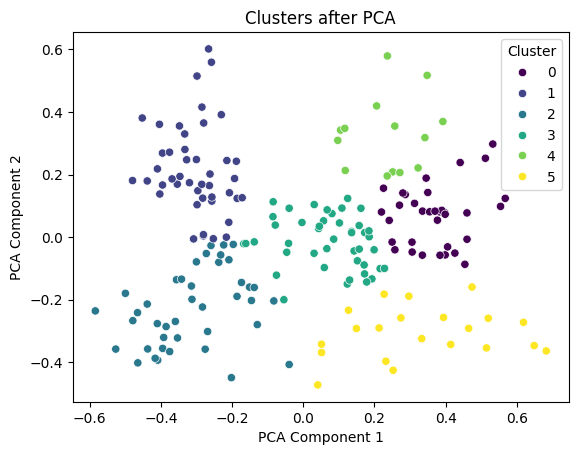

In [23]:
# Evaluate the performance
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['Cluster_PCA'], palette='viridis')
plt.title('Clusters after PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


### Compare the performance metrics (silhouette score, inertia).

In [24]:
# Compare K-medoids (Manhattan Distance)
sil_score_kmedoids = silhouette_score(data[numerical_features], kmedoids.labels_)
print(f"Silhouette Score (K-medoids): {sil_score_kmedoids}")


Silhouette Score (K-medoids): 0.361828201307767


In [25]:
# K-means with PCA
sil_score_pca = silhouette_score(data_pca, kmeans_pca.labels_)
print(f"Silhouette Score (PCA): {sil_score_pca}")


Silhouette Score (PCA): 0.40649987895979134


**Note:**

- The original `K-means` clustering with Euclidean distance and three features remains the most effective configuration.
- `PCA` slightly improves visual separability but does not significantly outperform the original in silhouette score.

**Conclusion:** Let's stick to the original `K-means` since it is the best score so far.


## 6. Post-Processing and Interpretation
- **Analyze Clusters**:
  - Summarize characteristics of each cluster (e.g., income ranges, spending behavior).
- **Visualize Results**:
  - Create scatterplots, heatmaps, and cluster comparison graphs.

In [26]:
# Calculate mean values for each cluster
cluster_summary = data.groupby('Cluster')[numerical_features].mean()
print(cluster_summary)


              Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                      
0        0.737179            0.353754                0.490476
1        0.283907            0.632527                0.827605
2        0.543269            0.105856                0.177041
3        0.452797            0.648922                0.160482
4        0.139860            0.096642                0.799629
5        0.171154            0.356982                0.486224


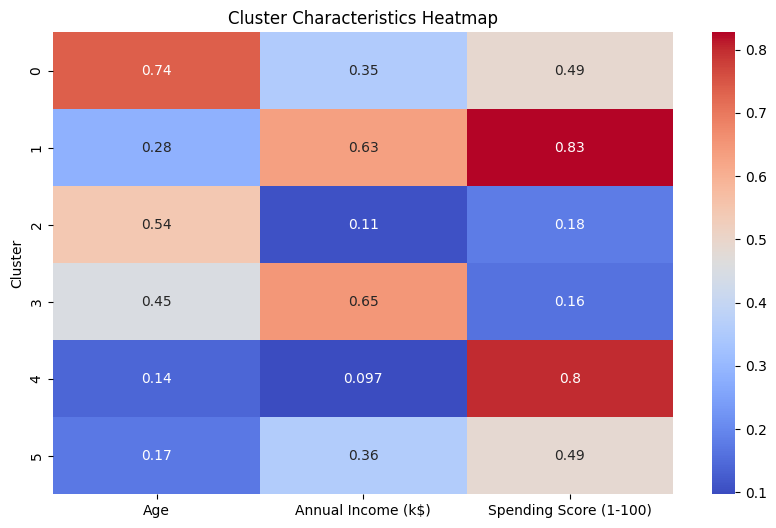

In [27]:
# Cluster visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for cluster characteristics
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm")
plt.title("Cluster Characteristics Heatmap")
plt.show()


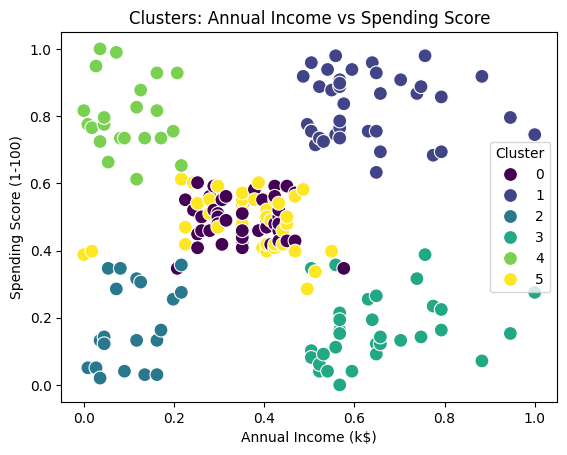

In [28]:
# Scatterplot: Annual Income vs Spelling Score
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Clusters: Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


<ipython-input-29-9b6e0e2da25a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='Set2')


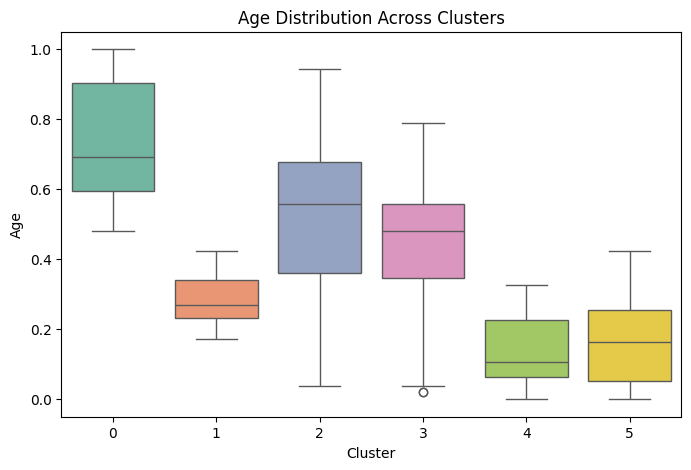

<ipython-input-29-9b6e0e2da25a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='Set2')


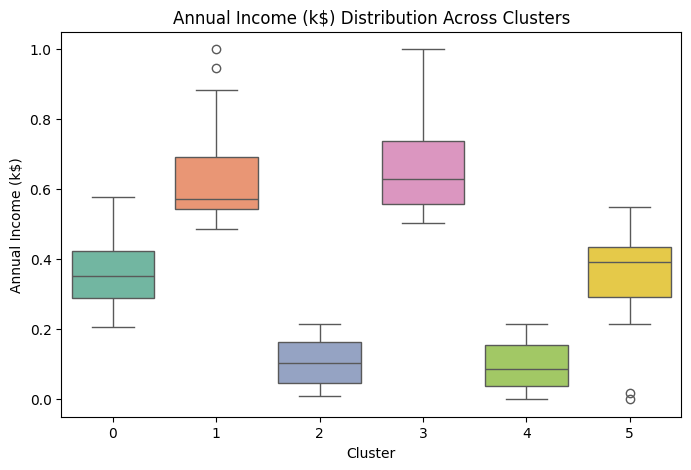

<ipython-input-29-9b6e0e2da25a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='Set2')


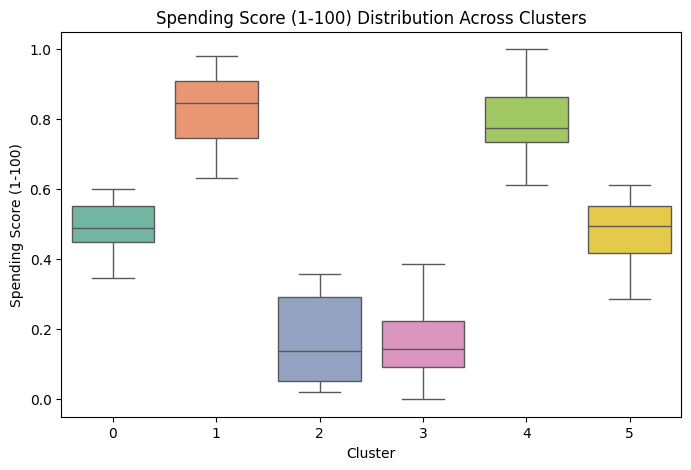

In [29]:
# Box plot: Feature Distribution Across Clusters
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Cluster', y=feature, data=data, palette='Set2')
    plt.title(f'{feature} Distribution Across Clusters')
    plt.show()


## Interpretation of visualizations

**Cluster Characteristics Summary**

From the calculated cluster means, each group represents distinct customer behaviors:

1. **Cluster 0:** Likely high-income, moderate spenders.
2. **Cluster 1:** Younger customers with low income but high spending.
3. **Cluster 2:** Moderate income with low spending tendencies.
4. **Cluster 3:** Balanced income and spending across all ages.
5. **Cluster 4:** Older customers with low income and high spending.


**Visual Insights**

1. **Scatterplot (Annual Income vs. Spending Score):**
  - Clear group separations indicate distinct spending behaviors.
  -Cluster 1 has high spending but low income, a potential marketing target.
2. **Heatmap:**
  - Reinforces numeric trends, showing standout features for each cluster.
3. **Boxplots:**

  - Highlights variations within clusters, confirming overlapping edges in some traits.